In [2]:
#Predict whether a building is high performance or not using machine learning algorithms such as desicion tree and svm
from IntelligentBuildingPerformanceDesign.AIBPD.data.preprocessing import PreprocessingCBECS
from IntelligentBuildingPerformanceDesign.AIBPD.data.database import Database
import numpy as np
from sklearn import tree
import pandas as pd

In [3]:
database=Database()
CBECS_DF=database.select('CBECS2012')
Preproc=PreprocessingCBECS()
CBECS_DF=CBECS_DF[CBECS_DF['CDD65']>=500]
CBECS_DF=CBECS_DF.reindex(range(CBECS_DF.shape[0]+1))
CBECS_DF=Preproc.forHECLClf(CBECS_DF)

Load CBECS2012 successfully
dataDF in preprocessing shape (5159, 715)
top3 0.24995853658536585 top10 0.82825 top23 1.9816949152542374 top25 2.1878 top75 12.352804878048781 top90 24.44525


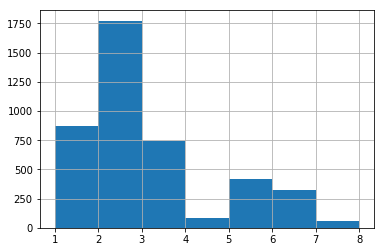

In [5]:
CBECS_DF=CBECS_DF.dropna()
CBECS_DF['MAINCL'].hist(bins=7)

In [6]:
HP=CBECS_DF[CBECS_DF['HECS']==1.0]
MP=CBECS_DF[CBECS_DF['HECS']==2.0]
LP=CBECS_DF[CBECS_DF['HECS']==0.0]
m1=HP.shape[0]
m2=MP.shape[0]
m3=LP.shape[0]
print(HP['EUICooling'].mean(),HP['EUICooling'].std())
print(MP['EUICooling'].mean(),MP['EUICooling'].std())
print(LP['EUICooling'].mean(),LP['EUICooling'].std())

1.0788071925551284 0.5045806634325443
5.923379265228518 2.756261804420197
17.205594572634606 3.3286973722404216


In [7]:
def cumulativeBar(axN,n22,legends):
    dataN=n22[np.any(n22>0.0, axis=1)]
    print('legend num',len(legends),'row of data',dataN.shape)
    ncolumns=dataN.shape[1]
    ind=range(ncolumns)
    axN.bar(ind,dataN[0,:],label=str(legends[0]))
    sumN=dataN[0,:]
    for i in range(1,dataN.shape[0]):
        if i>=2:
            sumN+=dataN[i-1,:]
        axN.bar(ind,dataN[i,:],bottom=sumN,label=str(legends[i]))
    return axN

In [8]:
def getLegend(index,binsArr,legendDict):
    legendslist=[]
    keys=list(legendDict.keys())
    for i in range(index.shape[0]):
        if index[i]:
            v1=binsArr[i]
            v2=binsArr[i+1]
            for j in keys:
                if float(j)>=v1 and float(j)<=v2:
                    legendslist.append(legendDict[j])
                    keys.remove(j)
    return legendslist    

In [9]:
def highInfluenceFactorsDetect(name_str,bin_num,HP,MP,LP,m1,m2,m3):
    (n_buildingAreaCategory1, bins_buildingAreaCategory1, patches) = plt.hist(HP[name_str],bins=range(bin_num),density=False,weights= [1./m1] * m1)
    (n_buildingAreaCategory2, bins_buildingAreaCategory2, patches) = plt.hist(MP[name_str],bins=range(bin_num),density=False,weights= [1./m2] * m2)
    (n_buildingAreaCategory3, bins_buildingAreaCategory3, patches) = plt.hist(LP[name_str],bins=range(bin_num),density=False,weights= [1./m3] * m3)
    diff=(n_buildingAreaCategory1-n_buildingAreaCategory3)
    diff_max=np.amax(diff)
    print('Attributes Name',name_str,'max diff',diff_max)

In [10]:
def featureAnalysis(attri_name,bin_num,legends_dict_buildingAreaCategory,HP,MP,LP,m1,m2,m3):
    (n_buildingAreaCategory1, bins_buildingAreaCategory1, patches) = plt.hist(HP[attri_name],bins=range(bin_num),density=False,weights= [1./m1] * m1)
    (n_buildingAreaCategory2, bins_buildingAreaCategory2, patches) = plt.hist(MP[attri_name],bins=range(bin_num),density=False,weights= [1./m2] * m2)
    (n_buildingAreaCategory3, bins_buildingAreaCategory3, patches) = plt.hist(LP[attri_name],bins=range(bin_num),density=False,weights= [1./m3] * m3)
    diff=(n_buildingAreaCategory1-n_buildingAreaCategory3)
    diff_max=np.amax(diff)
    print('Attributes Name',attri_name,'max diff',diff_max)
    
    n_stacked_buildingAreaCategory=np.vstack((n_buildingAreaCategory1,n_buildingAreaCategory2))
    n_stacked_buildingAreaCategory=np.vstack((n_stacked_buildingAreaCategory,n_buildingAreaCategory3)).T
    index_buildingAreaCategory=np.any(n_stacked_buildingAreaCategory>0.0, axis=1)

    fig_buildingAreaCategory=plt.figure(figsize=(10,6))
    ax2=fig_buildingAreaCategory.add_subplot(1,1,1)
    ax2.set_ylabel('Percentage')
    ax2.set_title(attri_name+' distributions in different building groups')
    
    legendList_buildingAreaCategory=getLegend(index_buildingAreaCategory,bins_buildingAreaCategory1,legends_dict_buildingAreaCategory)
    cumulativeBar(ax2,n_stacked_buildingAreaCategory,legendList_buildingAreaCategory)
    h, l = ax2.get_legend_handles_labels()
    ax2.set_xticklabels(labels=('','','Low heating energy buildings','','Medium heating energy builsings','','High heating energy buildings'))
    ax2.set_yticklabels(labels=('0','20%','40%','60%','80%','100%'))
    ax2.legend(loc='center right',bbox_to_anchor=(1.55,0.5))
    fig_buildingAreaCategory.savefig('.\\'+attri_name+"Distribution-climate3000.jpg",dpi=300,bbox_inches='tight')

In [11]:
def make_figure(n_tuple,attri_name,legends_dict_buildingAreaCategory,bins_buildingAreaCategory1,anchor=(1.35, 0.5)):
    n_buildingAreaCategory1,n_buildingAreaCategory2,n_buildingAreaCategory3=n_tuple
    n_stacked_n_buildingAreaCategory=np.vstack((n_buildingAreaCategory1,n_buildingAreaCategory2))
    n_stacked_n_buildingAreaCategory=np.vstack((n_stacked_n_buildingAreaCategory,n_buildingAreaCategory3)).T
    index_buildingAreaCategory=np.any(n_stacked_n_buildingAreaCategory>0.0, axis=1)

    fig_buildingAreaCategory=plt.figure(figsize=(10,6))
    ax2=fig_buildingAreaCategory.add_subplot(1,1,1)
    ax2.set_ylabel('Percentage')
    #ax2.set_xlabel('buildingAreaCategory')
    #legends=np.unique(HP['principleActivity'].values)
    ax2.set_title(attri_name+' distributions in different building groups')
    
    legendList_buildingAreaCategory=getLegend(index_buildingAreaCategory,bins_buildingAreaCategory1,legends_dict_buildingAreaCategory)
    #print('legend num',len(legendList_buildingAreaCategory),'row of data',n_stacked_n_buildingAreaCategory.shape)
    cumulativeBar(ax2,n_stacked_n_buildingAreaCategory,legendList_buildingAreaCategory)
    h, l = ax2.get_legend_handles_labels()
    ax2.set_xticklabels(labels=('','','Low heating energy buildings','','Medium heating energy builsings','','High heating energy buildings'))
    ax2.set_yticklabels(labels=('0','20%','40%','60%','80%','100%'))
    ax2.legend(loc='center right',bbox_to_anchor=anchor)
    fig_buildingAreaCategory.savefig('.\\'+attri_name+"Distribution-climate.jpg",dpi=300,bbox_inches='tight')

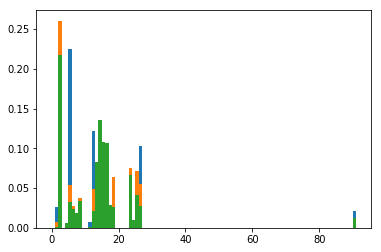

In [12]:
import matplotlib.pyplot as plt
(n_principleActivity1, bins_principleActivity1, patches) = plt.hist(HP['principleActivity'],bins=range(92),density=False,weights= [1./m1] * m1)
(n_principleActivity2, bins_principleActivity2, patches) = plt.hist(MP['principleActivity'],bins=range(92),density=False,weights= [1./m2] * m2)
(n_principleActivity3, bins_principleActivity3, patches) = plt.hist(LP['principleActivity'],bins=range(92),density=False,weights= [1./m3] * m3)
n_tuple_principleActivity=(n_principleActivity1,n_principleActivity2,n_principleActivity3)
attri_name_principleActivity='principleActivity'
legends_dict_principleActivity={1:'Vacant',2:'Office',4:'Laboratory',
              5:'Nonrefrigerated warehouse',6:'Food sales',7:'Public order and safety',8:'Outpatient health care',
            11: 'Refrigerated warehouse',12: 'Religious worship',13 : 'Public assembly',
            14:'Education',15: 'Food service',16:'Inpatient health care',17:'Nursing',18:'Lodging',
              23:'Strip shopping mall',24: 'Enclosed mall',25:'Retail other than mall',26:'Service',91: 'Other'}

legend num 20 row of data (20, 3)


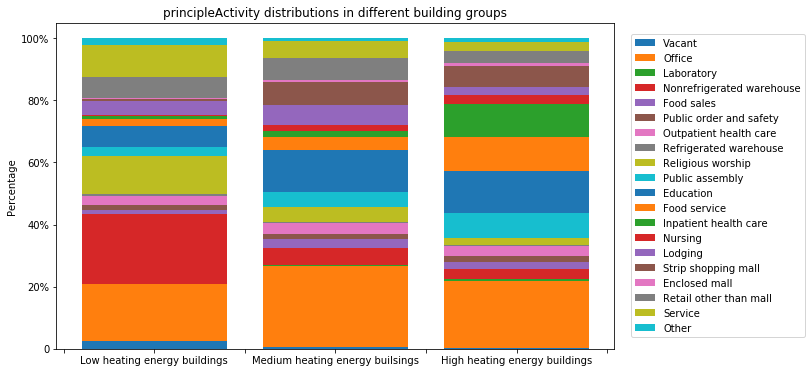

In [13]:
make_figure(n_tuple_principleActivity,attri_name_principleActivity,legends_dict_principleActivity,bins_principleActivity1,anchor=(1.35,0.5))

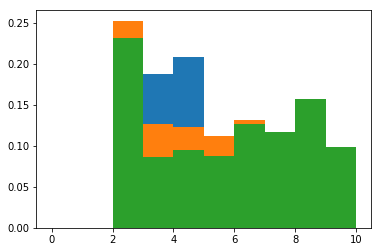

In [14]:
(n_buildingAreaCategory1, bins_buildingAreaCategory1, patches) = plt.hist(HP['buildingAreaCategory'],bins=range(11),density=False,weights= [1./m1] * m1)
(n_buildingAreaCategory2, bins_buildingAreaCategory2, patches) = plt.hist(MP['buildingAreaCategory'],bins=range(11),density=False,weights= [1./m2] * m2)
(n_buildingAreaCategory3, bins_buildingAreaCategory3, patches) = plt.hist(LP['buildingAreaCategory'],bins=range(11),density=False,weights= [1./m3] * m3)
n_tuple_buildingAreaCategory=(n_buildingAreaCategory1,n_buildingAreaCategory2,n_buildingAreaCategory3)
attri_name_buildingAreaCategory='buildingAreaCategory'
legends_dict_buildingAreaCategory={1 : '1,000 square feet or less',
2  :  '1,001 to 5,000 square feet',
3 : '5,001 to 10,000 square feet',
4 : '10,001 to 25,000 square feet',
5 : '25,001 to 50,000 square feet',
6 : '50,001 to 100,000 square feet',
7 : '100,001 to 200,000 square feet',
8 : '200,001 to 500,000 square feet',
9 : '500,001 to 1 million square feet',
10 : 'Over 1 million square feet'}

legend num 8 row of data (8, 3)


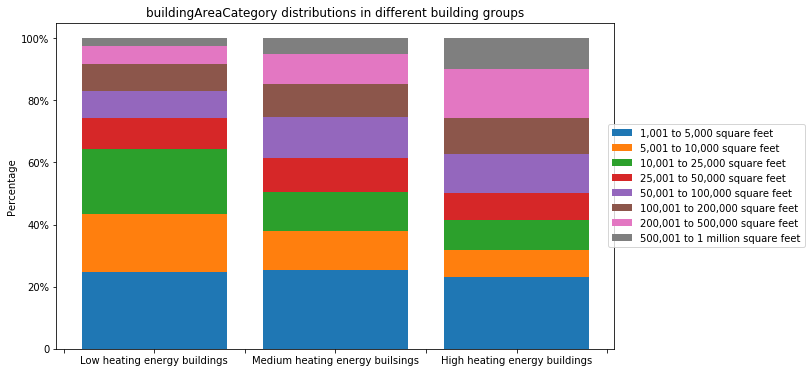

In [15]:
make_figure(n_tuple_buildingAreaCategory,attri_name_buildingAreaCategory,legends_dict_buildingAreaCategory,bins_buildingAreaCategory1,anchor=(1.35,0.5))

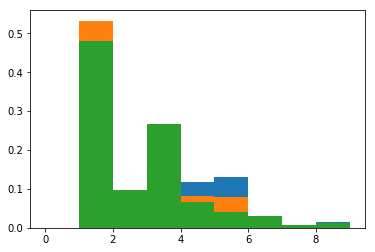

In [16]:
(n_wallConstruction1, bins_wallConstruction1, patches) =plt.hist(HP['wallConstruction'],bins=range(10),density=False,weights= [1./m1] * m1)
(n_wallConstruction2, bins_wallConstruction2, patches)= plt.hist(MP['wallConstruction'],bins=range(10),density=False,weights= [1./m2] * m2)
(n_wallConstruction3, bins_wallConstruction3, patches) =plt.hist(LP['wallConstruction'],bins=range(10),density=False,weights= [1./m3] * m3)
n_tuple_wallConstruction=(n_wallConstruction1,n_wallConstruction2,n_wallConstruction3)
attri_name_wallConstruction='wallConstruction'
legends_dict_wallConstruction={'1' : 'Brick, stone, or stucco',
'2' : 'Pre-cast concrete panels',
'3' : 'Concrete block or poured concrete (above grade)',
'4' : 'Aluminum, asbestos, plastic, or wood materials',
'5' : 'Sheet metal panels',
'6' : 'Window or vision glass (glass that can be seen through)',
'7' : 'Decorative or construction glass',
'8' : 'No one major type',
'9' : 'Other'}

legend num 8 row of data (8, 3)


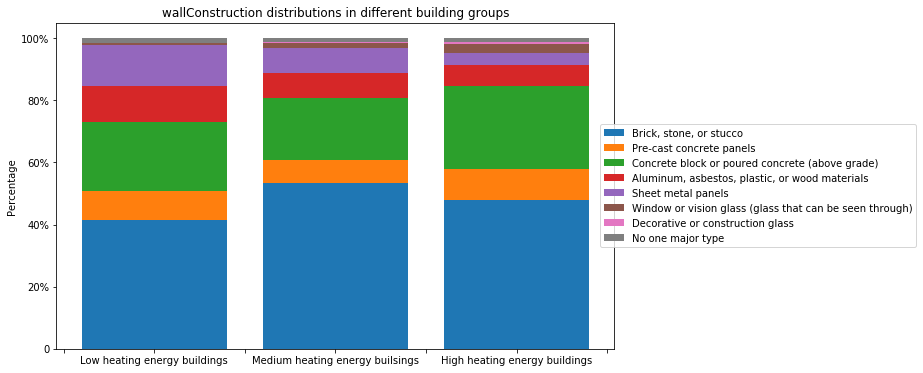

In [17]:
make_figure(n_tuple_wallConstruction,attri_name_wallConstruction,legends_dict_wallConstruction,bins_wallConstruction1,anchor=(1.55,0.5))

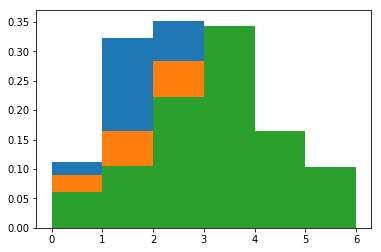

In [18]:
(n_WWR1, bins_WWR1, patches) =plt.hist(HP['WWR'],bins=range(7),density=False,weights= [1./m1] * m1)
(n_WWR2, bins_WWR2, patches) =plt.hist(MP['WWR'],bins=range(7),density=False,weights= [1./m2] * m2)
(n_WWR3, bins_WWR3, patches) =plt.hist(LP['WWR'],bins=range(7),density=False,weights= [1./m3] * m3)
n_tuple_WWR=(n_WWR1,n_WWR2,n_WWR3)
attri_name_WWR='WWR'
legends_dict_WWR={1 : '1 percent or less',
2 : '2 to 10 percent',
3 : '11 to 25 percent',
4 : '26 to 50 percent',
5 : '51 to 75 percent',
6 : '76 to 100 percent',
0 : 'Not applicable'}

legend num 7 row of data (6, 3)


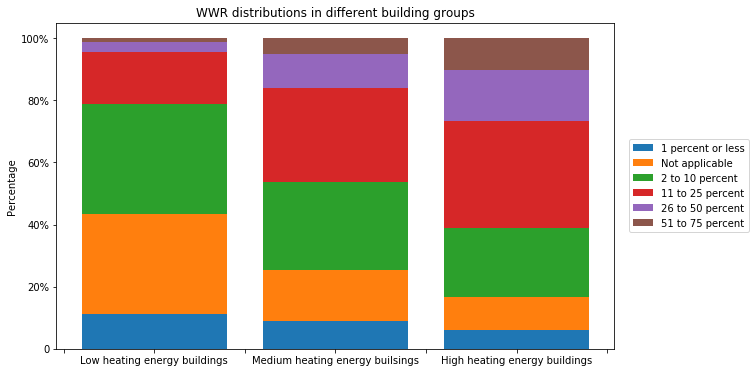

In [19]:
make_figure(n_tuple_WWR,attri_name_WWR,legends_dict_WWR,bins_WWR1,anchor=(1.25,0.5))

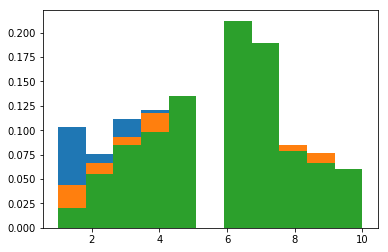

In [20]:
(n_yrConstructionCategory1, bins_yrConstructionCategory1, patches)=plt.hist(HP['yrConstructionCategory'],bins=11,density=False,weights= [1./m1] * m1)
(n_yrConstructionCategory2, bins_yrConstructionCategory2, patches)=plt.hist(MP['yrConstructionCategory'],bins=11,density=False,weights= [1./m2] * m2)
(n_yrConstructionCategory3, bins_yrConstructionCategory3, patches)=plt.hist(LP['yrConstructionCategory'],bins=11,density=False,weights= [1./m3] * m3)
n_tuple_yrConstructionCategory=(n_yrConstructionCategory1,n_yrConstructionCategory2,n_yrConstructionCategory3)
attri_name_yrConstructionCategory='yrConstructionCategory'
legends_dict_yrConstructionCategory={1 : 'Before 1920',
2 :'1920 to 1945',
3 : '1946 to 1959',
4 : '1960 to 1969',
5 : '1970 to 1979',
6: '1980 to 1989',
7 : '1990 to 1999',
8 : '2000 to 2003',
9 : '2004 to 2007',
10 : '2008 to 2012'}

legend num 10 row of data (10, 3)


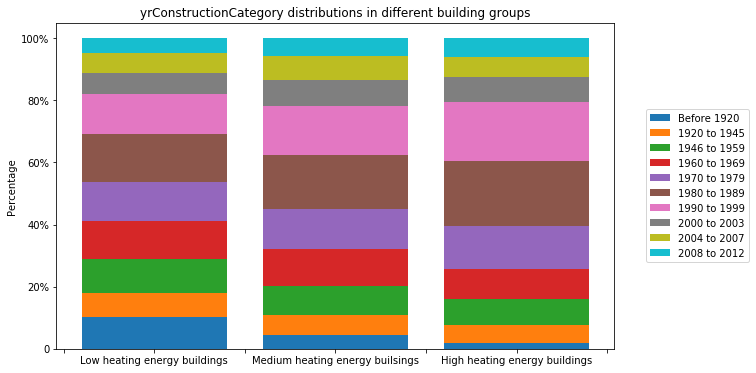

In [21]:
make_figure(n_tuple_yrConstructionCategory,attri_name_yrConstructionCategory,legends_dict_yrConstructionCategory,bins_yrConstructionCategory1,anchor=(1.25,0.5))

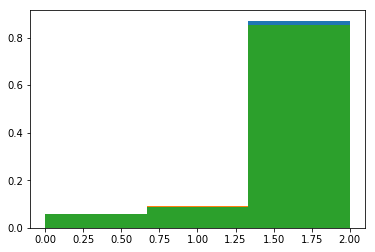

In [22]:
(n_insulationUpgrade1, bins_insulationUpgrade1, patches)=plt.hist(HP['insulationUpgrade'],bins=3,density=False,weights= [1./m1] * m1)
(n_insulationUpgrade2, bins_insulationUpgrade2, patches)=plt.hist(MP['insulationUpgrade'],bins=3,density=False,weights= [1./m2] * m2)
(n_insulationUpgrade3, bins_insulationUpgrade3, patches)=plt.hist(LP['insulationUpgrade'],bins=3,density=False,weights= [1./m3] * m3)
n_tuple_insulationUpgrade=(n_insulationUpgrade1,n_insulationUpgrade2,n_insulationUpgrade3)
attri_name_insulationUpgrade='insulationUpgrade'
legends_dict_insulationUpgrade={1 : 'Yes',2 : 'No',0 : 'Not applicable'}

legend num 3 row of data (3, 3)


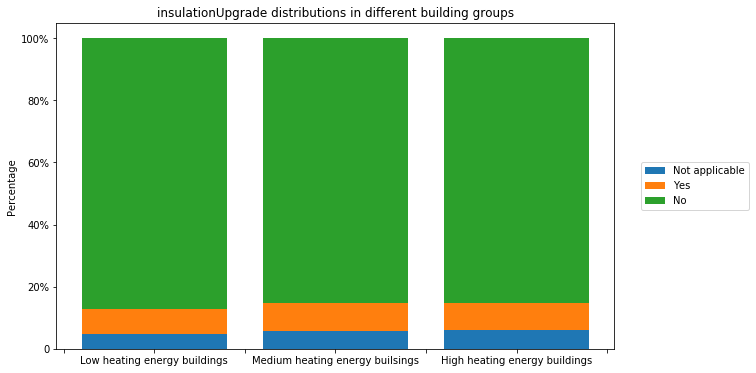

In [23]:
make_figure(n_tuple_insulationUpgrade,attri_name_insulationUpgrade,legends_dict_insulationUpgrade,bins_insulationUpgrade1,anchor=(1.25,0.5))

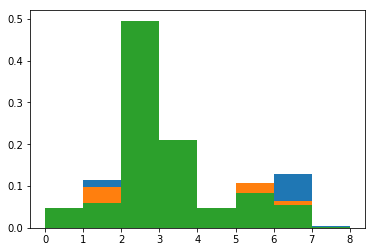

In [24]:
(n_MAINHT1, bins_MAINHT1, patches)=plt.hist(HP['MAINHT'],bins=range(9),density=False,weights= [1./m1] * m1)
(n_MAINHT2, bins_MAINHT2, patches)=plt.hist(MP['MAINHT'],bins=range(9),density=False,weights= [1./m2] * m2)
(n_MAINHT3, bins_MAINHT3, patches)=plt.hist(LP['MAINHT'],bins=range(9),density=False,weights= [1./m3] * m3)
n_tuple_MAINHT=(n_MAINHT1,n_MAINHT2,n_MAINHT3)
attri_name_MAINHT='MAINHT'
legends_dict_MAINHT={1 : 'Furnaces that heat air directly',
2 : 'Packaged central unit',
3 : 'Boilers inside',
4 : 'District heating',
5: 'Heat pumps',
6 : 'Individual space heaters',
7 : 'Other heating equipment',
0 : 'Not applicable'}

legend num 8 row of data (8, 3)


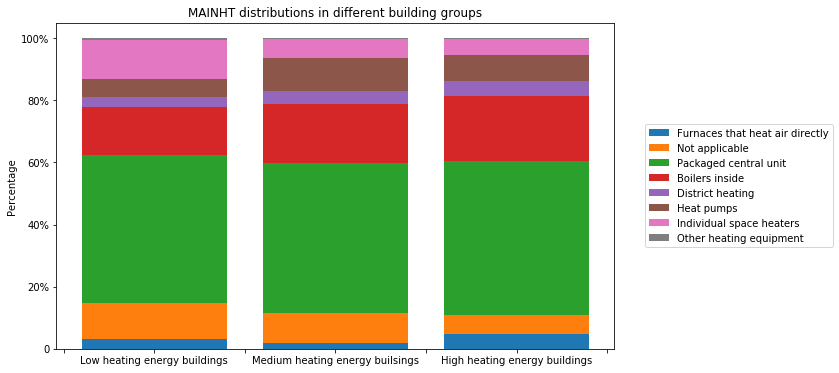

In [25]:
make_figure(n_tuple_MAINHT,attri_name_MAINHT,legends_dict_MAINHT,bins_MAINHT1,anchor=(1.4,0.5))

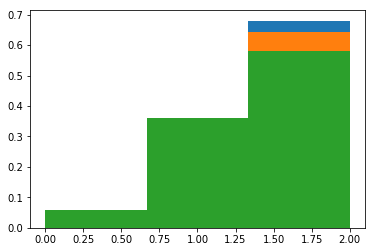

In [26]:
(n_HVACUpgrade1, bins_HVACUpgrade1, patches)=plt.hist(HP['HVACUpgrade'],bins=3,density=False,weights= [1./m1] * m1)
(n_HVACUpgrade2, bins_HVACUpgrade2, patches)=plt.hist(MP['HVACUpgrade'],bins=3,density=False,weights= [1./m2] * m2)
(n_HVACUpgrade3, bins_HVACUpgrade3, patches)=plt.hist(LP['HVACUpgrade'],bins=3,density=False,weights= [1./m3] * m3)
n_tuple=(n_HVACUpgrade1,n_HVACUpgrade2,n_HVACUpgrade3)
attri_name='HVACUpgrade'
legends_dict_HVACUpgrade={1:"Yes",2:"No",0:"Missing Value"}

legend num 3 row of data (3, 3)


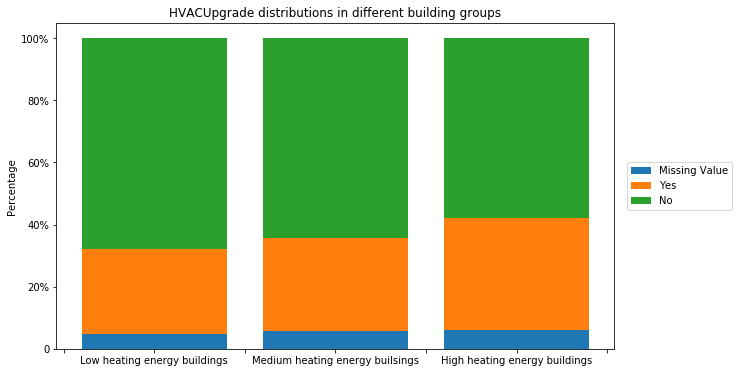

In [27]:
make_figure(n_tuple,attri_name,legends_dict_HVACUpgrade,bins_HVACUpgrade1,anchor=(1.22,0.5))

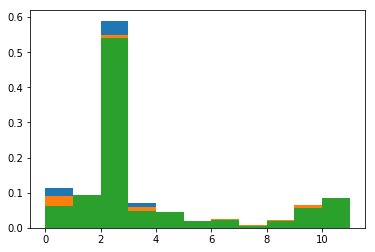

In [28]:
(n_buildingShape1, bins_buildingShape1, patches)=plt.hist(HP['buildingShape'],bins=range(12),density=False,weights= [1./m1] * m1)
(n_buildingShape2, bins_buildingShape2, patches)=plt.hist(MP['buildingShape'],bins=range(12),density=False,weights= [1./m2] * m2)
(n_buildingShape3, bins_buildingShape3, patches)=plt.hist(LP['buildingShape'],bins=range(12),density=False,weights= [1./m3] * m3)
n_tuple_buildingShape=(n_buildingShape1,n_buildingShape2,n_buildingShape3)
attri_name_buildingShape='buildingShape'
legends_dict_buildingShape={1 : 'Square',
2 : 'Wide rectangle',
3 : 'Narrow rectangle',
4 : 'Rectangle',
5 : '"H" shaped',
6: '"U" shaped',
7: '"E" shaped',
8: '"T" shaped',
9 : '"L" shaped',
10 :'"+" or cross shaped',
11 : 'Other shape',
0 :'Not applicable'}

legend num 12 row of data (11, 3)


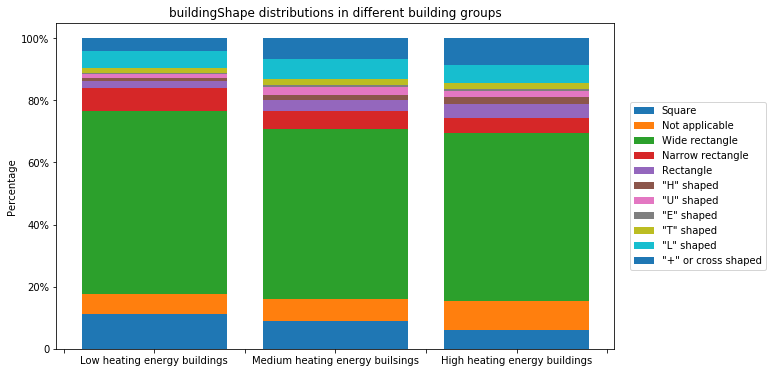

In [29]:
make_figure(n_tuple_buildingShape,attri_name_buildingShape,legends_dict_buildingShape,bins_buildingShape1,anchor=(1.28,0.5))

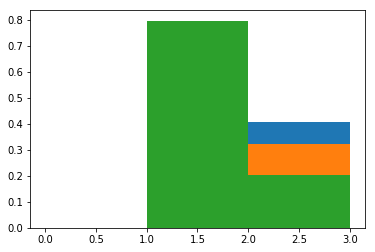

In [30]:
(n_OPNWE1, bins_OPNWE1, patches)=plt.hist(HP['OPNWE'],bins=range(4),density=False,weights= [1./m1] * m1)
(n_OPNWE2, bins_OPNWE2, patches)=plt.hist(MP['OPNWE'],bins=range(4),density=False,weights= [1./m2] * m2)
(n_OPNWE3, bins_OPNWE3, patches)=plt.hist(LP['OPNWE'],bins=range(4),density=False,weights= [1./m3] * m3)
n_tuple_OPNWE=(n_OPNWE1,n_OPNWE2,n_OPNWE3)
attri_name_OPNWE='OPNWE'
legends_dict_OPNWE={1 :'Yes',
2: 'No',
0:'Missing'}

legend num 2 row of data (2, 3)


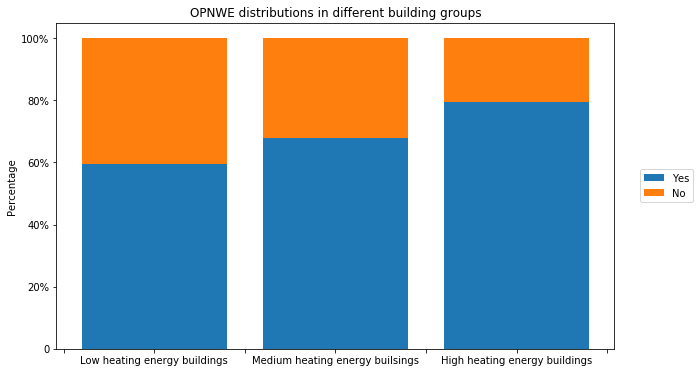

In [31]:
make_figure(n_tuple_OPNWE,attri_name_OPNWE,legends_dict_OPNWE,bins_OPNWE1,anchor=(1.15,0.5))

In [32]:
(n_HDD65Category1, bins_HDD65Category1, patches)=plt.hist(HP['HDD65Category'],bins=range(6),density=False,weights= [1./m1] * m1)
(n_HDD65Category2, bins_HDD65Category2, patches)=plt.hist(MP['HDD65Category'],bins=range(6),density=False,weights= [1./m2] * m2)
(n_HDD65Category3, bins_HDD65Category3, patches)=plt.hist(LP['HDD65Category'],bins=range(6),density=False,weights= [1./m3] * m3)
n_tuple_HDD65Category=(n_HDD65Category1,n_HDD65Category2,n_HDD65Category3)
attri_name_HDD65Category='HDD65Category'
legends_dict_HDD65Category={1 :'1',
2: '2',
3:'3',
4:'4',
5:'5',
0:'Missing'}

KeyError: 'HDD65Category'

legend num 3 row of data (3, 3)


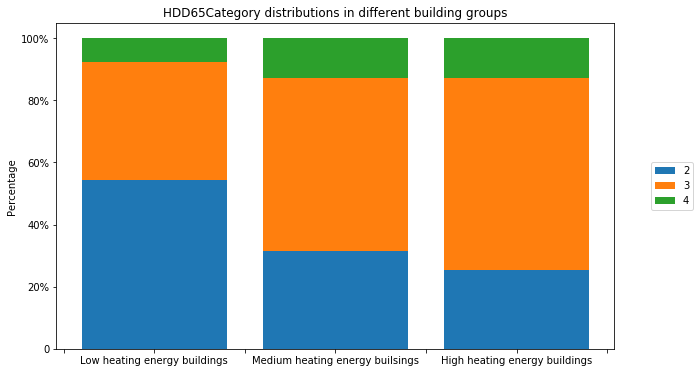

In [33]:
make_figure(n_tuple_HDD65Category,attri_name_HDD65Category,legends_dict_HDD65Category,bins_HDD65Category1,anchor=(1.15,0.5))

legend num 7 row of data (6, 3)


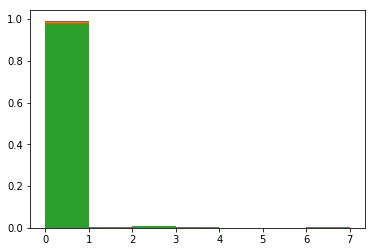

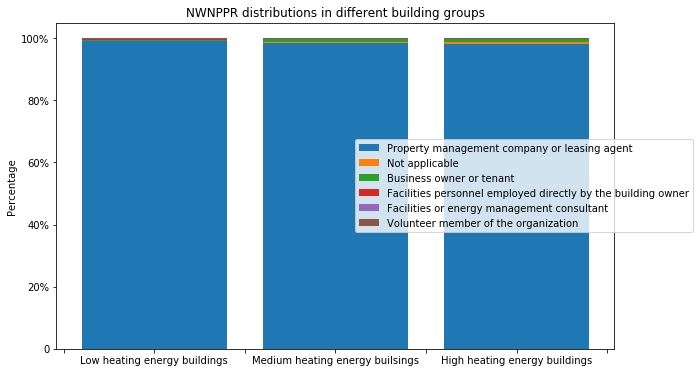

In [33]:
(n_NWNPPR1, bins_NWNPPR1, patches)=plt.hist(HP['NWNPPR'],bins=range(8),density=False,weights= [1./m1] * m1)
(n_NWNPPR2, bins_NWNPPR2, patches)=plt.hist(MP['NWNPPR'],bins=range(8),density=False,weights= [1./m2] * m2)
(n_NWNPPR3, bins_NWNPPR3, patches)=plt.hist(LP['NWNPPR'],bins=range(8),density=False,weights= [1./m3] * m3)
n_tuple_NWNPPR=(n_NWNPPR1,n_NWNPPR2,n_NWNPPR3)
attri_name_NWNPPR='NWNPPR'
legends_dict_NWNPPR={1 : 'Property management company or leasing agent',
2 : 'Business owner or tenant',
3 : 'Facilities personnel employed directly by the building owner',
4 : 'Facilities or energy management consultant',
5 : 'Volunteer member of the organization',
6 : 'Manager with general supervisory duties',
7 : 'Other',
0 : 'Not applicable'}
make_figure(n_tuple_NWNPPR,attri_name_NWNPPR,legends_dict_NWNPPR,bins_NWNPPR1,anchor=(1.15,0.5))

legend num 3 row of data (3, 3)


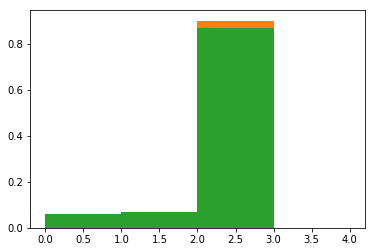

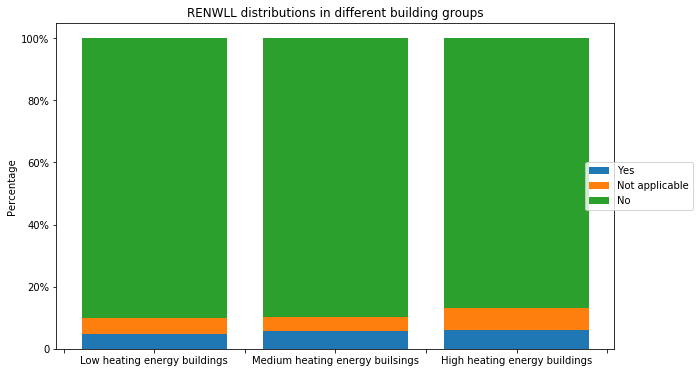

In [34]:
(n_RENWLL1, bins_RENWLL1, patches)=plt.hist(HP['RENWLL'],bins=range(5),density=False,weights= [1./m1] * m1)
(n_RENWLL2, bins_RENWLL2, patches)=plt.hist(MP['RENWLL'],bins=range(5),density=False,weights= [1./m2] * m2)
(n_RENWLL3, bins_RENWLL3, patches)=plt.hist(LP['RENWLL'],bins=range(5),density=False,weights= [1./m3] * m3)
n_tuple_RENWLL=(n_RENWLL1,n_RENWLL2,n_RENWLL3)
attri_name_RENWLL='RENWLL'
legends_dict_RENWLL={1 : 'Yes',
2 : 'No',
0 : 'Not applicable'}
make_figure(n_tuple_RENWLL,attri_name_RENWLL,legends_dict_RENWLL,bins_RENWLL1,anchor=(1.15,0.5))

legend num 4 row of data (4, 3)


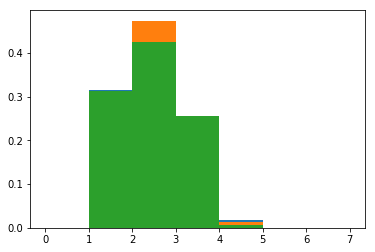

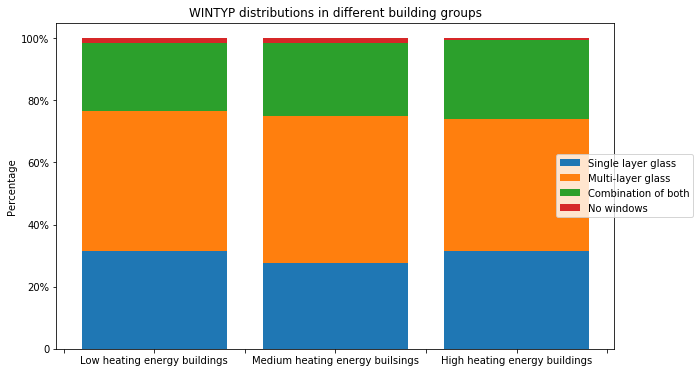

In [35]:
(n_WINTYP1, bins_WINTYP1, patches)=plt.hist(HP['WINTYP'],bins=range(8),density=False,weights= [1./m1] * m1)
(n_WINTYP2, bins_WINTYP2, patches)=plt.hist(MP['WINTYP'],bins=range(8),density=False,weights= [1./m2] * m2)
(n_WINTYP3, bins_WINTYP3, patches)=plt.hist(LP['WINTYP'],bins=range(8),density=False,weights= [1./m3] * m3)
n_tuple_WINTYP=(n_WINTYP1,n_WINTYP2,n_WINTYP3)
attri_name_WINTYP='WINTYP'
legends_dict_WINTYP={1: 'Single layer glass',2: 'Multi-layer glass',3 : 'Combination of both',
4 : 'No windows'}
make_figure(n_tuple_WINTYP,attri_name_WINTYP,legends_dict_WINTYP,bins_WINTYP1,anchor=(1.15,0.5))

In [37]:
import pandas as pd
HP['HEATPC']=pd.cut(HP['HEATP'],5,labels=range(5))
MP['HEATPC']=pd.cut(MP['HEATP'],5,labels=range(5))
LP['HEATPC']=pd.cut(LP['HEATP'],5,labels=range(5))

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

legend num 6 row of data (5, 3)


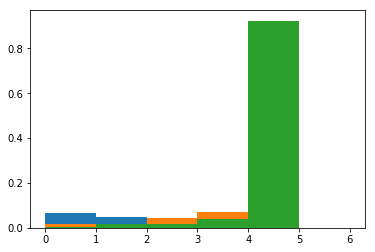

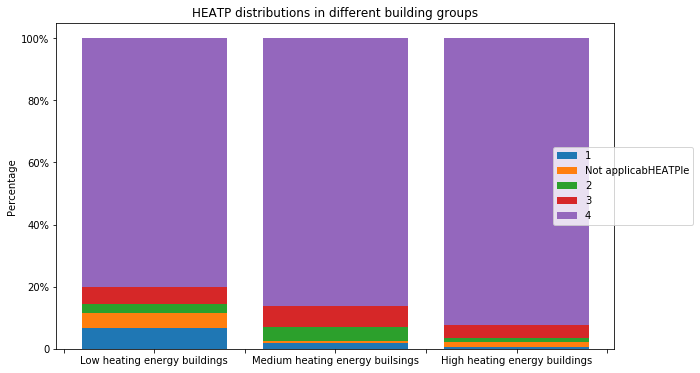

In [38]:
(n_HEATP1, bins_HEATP1, patches)=plt.hist(HP['HEATPC'],bins=range(7),density=False,weights= [1./m1] * m1)
(n_HEATP2, bins_HEATP2, patches)=plt.hist(MP['HEATPC'],bins=range(7),density=False,weights= [1./m2] * m2)
(n_HEATP3, bins_HEATP3, patches)=plt.hist(LP['HEATPC'],bins=range(7),density=False,weights= [1./m3] * m3)
n_tuple_HEATP=(n_HEATP1,n_HEATP2,n_HEATP3)
attri_name_HEATP='HEATP'
legends_dict_HEATP={1 : '1',
2 : '2',
3 : '3',
4 : '4',
5 : '5',
0 : 'Not applicabHEATPle'}
make_figure(n_tuple_HEATP,attri_name_HEATP,legends_dict_HEATP,bins_HEATP1,anchor=(1.15,0.5))

Attributes Name roofConstuction max diff 0.10816326530612264
legend num 8 row of data (8, 3)


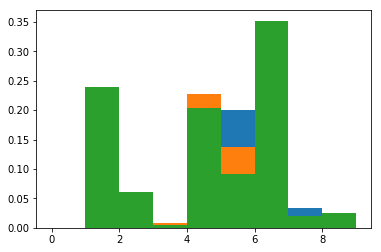

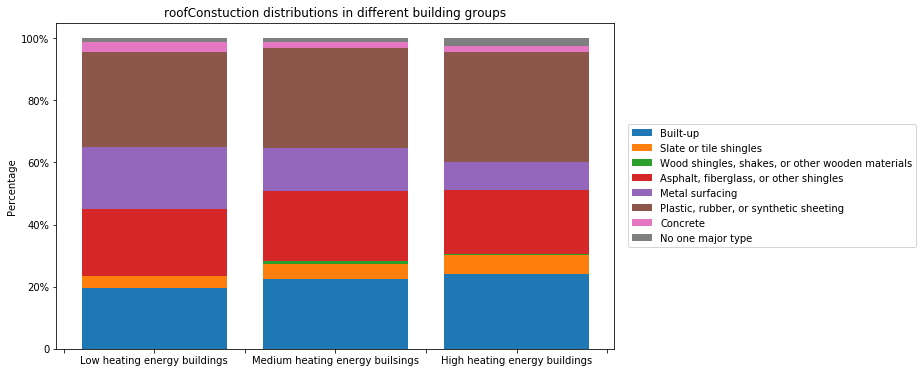

In [51]:
legends_dict_roofconstruction={1:'Built-up',
2 : 'Slate or tile shingles',
3 : 'Wood shingles, shakes, or other wooden materials',
4 : 'Asphalt, fiberglass, or other shingles',
5 : 'Metal surfacing',
6 : 'Plastic, rubber, or synthetic sheeting',
7 : 'Concrete',
8 : 'No one major type',9 : 'Other'}
bin_num_roof=10
attri_name_roof='roofConstuction'
featureAnalysis(attri_name_roof,bin_num_roof,legends_dict_roofconstruction,HP,MP,LP,m1,m2,m3)

Attributes Name insulationUpgrade max diff 0.013142857142863229
Attributes Name buildingShape max diff 0.0504615384615383
Attributes Name HVACUpgrade max diff 0.013142857142863229
Attributes Name numFloors max diff 0.08654945054944752
Attributes Name buildingAreaCategory max diff 0.11375824175823895
Attributes Name WINTYP max diff 0.027956043956047838
Attributes Name RENWLL max diff 0.030197802197808654
Attributes Name OPNWE max diff 0.19995604395603972
Attributes Name MAINHT max diff 0.07415384615384446
Attributes Name yrConstructionCategory max diff 0.08285714285714268
Attributes Name principleActivity max diff 0.1928351648351686
Attributes Name wallConstruction max diff 0.09028571428571208
Attributes Name WWR max diff 0.21881318681319015


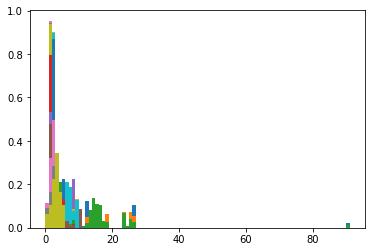

In [37]:
highInfluenceFactorsDetect('insulationUpgrade',3,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('buildingShape',12,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('HVACUpgrade',3,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('numFloors',7,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('buildingAreaCategory',10,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('WINTYP',5,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('RENWLL',5,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('OPNWE',4,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('MAINHT',9,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('yrConstructionCategory',11,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('principleActivity',92,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('wallConstruction',10,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('WWR',7,HP,MP,LP,m1,m2,m3)

Attributes Name WKHRSC max diff 0.1293626373626407
Attributes Name OWNTYPE max diff 0.13151648351648593
Attributes Name MONUSE max diff 0.011428571428571432
Attributes Name region max diff 0.13670329670330084
Attributes Name censusRegion max diff 0.07841758241758189
Attributes Name climateZone max diff 0.32663736263736687
Attributes Name numEmployeesCategory max diff 0.16316483516483657
Attributes Name RENWLL max diff 0.030197802197808654
Attributes Name WHOPPR max diff 0.02413186813186763
Attributes Name roofConstuction max diff 0.06496703296703199


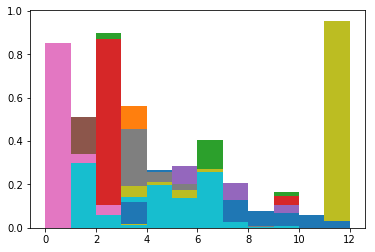

In [38]:
highInfluenceFactorsDetect('WKHRSC',8,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('OWNTYPE',9,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('MONUSE',13,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('region',13,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('censusRegion',13,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('climateZone',13,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('numEmployeesCategory',13,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('RENWLL',13,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('WHOPPR',13,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('roofConstuction',13,HP,MP,LP,m1,m2,m3)

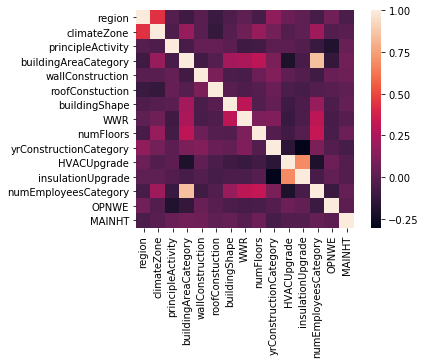

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
fig,ax = plt.subplots()
corrMatt=CBECS_DF[['region','climateZone','principleActivity','buildingAreaCategory','wallConstruction',\
                  'roofConstuction','buildingShape','WWR','numFloors','yrConstructionCategory','HVACUpgrade',\
                   'insulationUpgrade','numEmployeesCategory','OPNWE','MAINHT']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
ax=sn.heatmap(corrMatt,square=True)

In [14]:
CBECS_DF_clf=CBECS_DF[CBECS_DF['HEHS']>=0.0][CBECS_DF['HEHS']<=1.0]
CBECS_DF_clf['OCCUPYPC']=pd.cut(CBECS_DF_clf['OCCUPYP'],5,labels=range(5))

In [15]:
X=CBECS_DF_clf[['principleActivity','WWR','yrConstructionCategory','MAINHT','OPNWE','HDD65Category','WINTYP',\
                'WKHRSC','ELHT1','OCCUPYPC','STHT1']].values
Y=CBECS_DF_clf['HEHS'].values
m=CBECS_DF_clf.shape[0]
n=int(0.7*m)

In [16]:
from sklearn.metrics import classification_report
def past_ana(Y_neigh,Y):
    j=0
    k=0
    l=0
    for i in range(Y_neigh.shape[0]):
        if Y_neigh[i]==1.0 and Y[i]==1.0:
            j+=1
        elif Y_neigh[i]==1.0 and Y[i]==0.0:
            k+=1
        elif Y_neigh[i]==0.0 and Y[i]==1.0:
            l+=1
    print('(y=1,Y=1):',j,'(y=1.0,Y=0.0):',k,'(y=0.0,Y=1.0):',l,'(effective 1.0):',j/(k+1))
    print(classification_report(Y_neigh,Y))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=3)
clf_neigh.fit(X[:n,:],Y[:n])
Y_neigh=clf_neigh.predict(X[n:m,:])
print('Score',clf_neigh.score(X[n:m,:],Y[n:m]))
past_ana(Y_neigh,Y[n:m])

Score 0.7610619469026548
(y=1,Y=1): 43 (y=1.0,Y=0.0): 13 (y=0.0,Y=1.0): 14 (effective 1.0): 3.0714285714285716
             precision    recall  f1-score   support

        0.0       0.77      0.75      0.76        57
        1.0       0.75      0.77      0.76        56

avg / total       0.76      0.76      0.76       113



In [18]:
from sklearn import tree
clf_dt=tree.DecisionTreeClassifier()
clf_dt.fit(X[:n,:],Y[:n])
Y_dt=clf_dt.predict(X[n:m,:])
print(clf_dt.score(X[n:m,:],Y[n:m]))
past_ana(Y_dt,Y[n:m])

0.8230088495575221
(y=1,Y=1): 47 (y=1.0,Y=0.0): 10 (y=0.0,Y=1.0): 10 (effective 1.0): 4.2727272727272725
             precision    recall  f1-score   support

        0.0       0.82      0.82      0.82        56
        1.0       0.82      0.82      0.82        57

avg / total       0.82      0.82      0.82       113



In [19]:
from sklearn.ensemble import BaggingClassifier
clf_bag=BaggingClassifier()
clf_bag.fit(X[:n,:],Y[:n])
print(clf_bag.score(X[n:m,:],Y[n:m]))
Y_bag=clf_bag.predict(X[n:m,:])
past_ana(Y_bag,Y[n:m])

0.7522123893805309
(y=1,Y=1): 40 (y=1.0,Y=0.0): 11 (y=0.0,Y=1.0): 17 (effective 1.0): 3.3333333333333335
             precision    recall  f1-score   support

        0.0       0.80      0.73      0.76        62
        1.0       0.70      0.78      0.74        51

avg / total       0.76      0.75      0.75       113



In [21]:
from sklearn.ensemble import ExtraTreesClassifier
clf_ETC=ExtraTreesClassifier()
clf_ETC.fit(X[:n,:],Y[:n])
print(clf_ETC.score(X[n:m,:],Y[n:m]))
Y_ETC=clf_ETC.predict(X[n:m,:])
past_ana(Y_ETC,Y[n:m])

0.8230088495575221
(y=1,Y=1): 44 (y=1.0,Y=0.0): 7 (y=0.0,Y=1.0): 13 (effective 1.0): 5.5
             precision    recall  f1-score   support

        0.0       0.88      0.79      0.83        62
        1.0       0.77      0.86      0.81        51

avg / total       0.83      0.82      0.82       113



In [20]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
reg = LinearRegression()
reg.fit(X[:n,:],Y[:n])
reg.score(X[n:m,:],Y[n:m])

0.5044988855818187

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
df = pd.DataFrame({'a': [1, 1, 2, 3, 4],'b': [2, 2, 3, 2, 1],'c': [4, 6, 7, 8, 9],'d': [4, 3, 4, 5, 4]})
X1 = add_constant(CBECS_DF[['censusRegion','principleActivity','numPeoplePerAreaCate','wallConstruction','WWR','numFloors',#
            'yrConstructionCategory','insulationUpgrade',\
            #'ELHT1','NGHT1','STHT1','HWHT1',\buildingAreaCategory
            'MAINHT']])
pd.Series([variance_inflation_factor(X1.values.astype(float), i) for i in range(X1.shape[1])], index=X1.columns)

const                     36.019603
censusRegion               1.016134
principleActivity          1.027938
numPeoplePerAreaCate       1.082509
wallConstruction           1.063538
WWR                        1.088139
numFloors                  1.016744
yrConstructionCategory     1.148044
insulationUpgrade          1.084472
MAINHT                     1.019407
dtype: float64

In [45]:
from sklearn.feature_selection import VarianceThreshold
database=Database()
CBECS_DF_new=database.select('CBECS2012')

#CBECS_DF=CBECS_DF.convert_objects(convert_numeric=True)
CBECS_DF_new=CBECS_DF_new.fillna(value=0)
X=CBECS_DF_new[['principleActivity','buildingShape','WWR','wallConstruction','MAINHT',\
            'OPNWE','insulationUpgrade','insulationUpgrade','WINTYP',]].values
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
sel.get_support(indices=True)

Load CBECS2012 successfully


array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [119]:
HP['OCCUPYPC']=pd.cut(HP['OCCUPYP'],5,labels=range(5))
MP['OCCUPYPC']=pd.cut(MP['OCCUPYP'],5,labels=range(5))
LP['OCCUPYPC']=pd.cut(LP['OCCUPYP'],5,labels=range(5))
CBECS_DF_clf['OCCUPYPC']=pd.cut(CBECS_DF_clf['OCCUPYP'],5,labels=range(5))
HP['CDD65C']=pd.qcut(HP['CDD65'],5,labels=range(5))
MP['CDD65C']=pd.qcut(MP['CDD65'],5,labels=range(5))
LP['CDD65C']=pd.qcut(LP['CDD65'],5,labels=range(5))
CBECS_DF_clf['CDD65C']=pd.qcut(CBECS_DF_clf['CDD65'],5,labels=range(5))

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [120]:
from sklearn.feature_selection import SelectKBest, chi2
X_big=CBECS_DF_clf[['censusRegion','principleActivity','numPeoplePerAreaCate','wallConstruction',\
                    'WWR','numFloors','yrConstructionCategory','HVACUpgrade',\
                    'WKHRSC','HDD65','CDD65C','ELHT1','NGHT1','STHT1','HWHT1','RENWIN',\
                    'OCCUPYPC','OPNWE','MAINHT']].values
sel2=SelectKBest(chi2,k=8)
X_new=sel2.fit_transform(X_big,Y)
sel2.get_support(indices=True)

array([ 1,  5,  8,  9, 10, 11, 13, 16], dtype=int64)

Attributes Name WKHRSC max diff 0.1367346938775498
Attributes Name CDD65C max diff 0.0010204081632665396
Attributes Name ELHT1 max diff 0.6295918367346925
Attributes Name OCCUPYPC max diff 0.11122448979591915
Attributes Name STHT1 max diff 0.1257369614512477


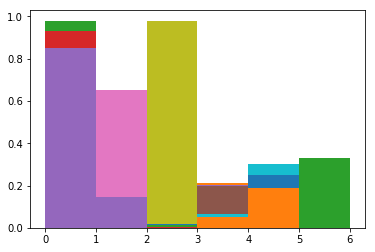

In [121]:
highInfluenceFactorsDetect('WKHRSC',7,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('CDD65C',7,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('ELHT1',7,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('OCCUPYPC',7,HP,MP,LP,m1,m2,m3)
highInfluenceFactorsDetect('STHT1',7,HP,MP,LP,m1,m2,m3)

Attributes Name ELHT1 max diff 0.6295918367346925
legend num 2 row of data (2, 3)


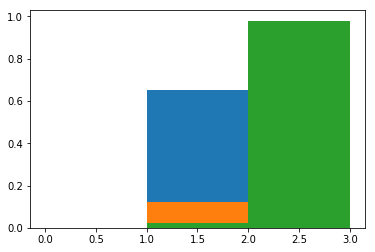

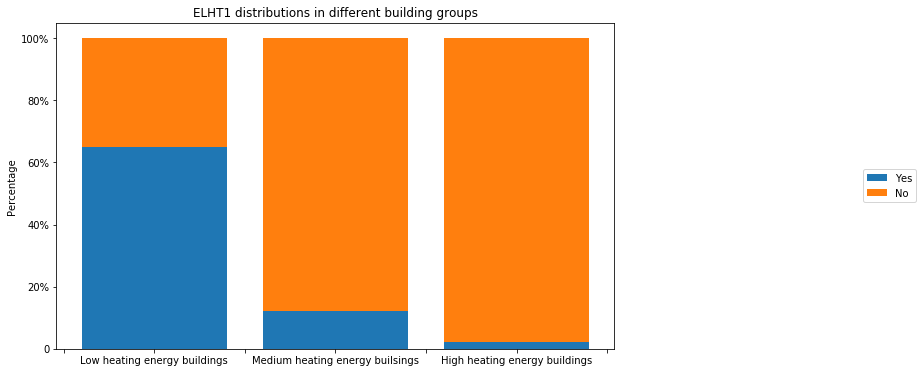

In [113]:
attri_name_ELHT1='ELHT1'
legends_dict_ELHT1={1:'Yes',2:'No',0:'Missing'}
bin_num_ELHT1=4
featureAnalysis(attri_name_ELHT1,bin_num_ELHT1,legends_dict_ELHT1,HP,MP,LP,m1,m2,m3)

In [ ]:
attri_name_ELHT1='ELHT1'
legends_dict_ELHT1={1:'Yes',2:'No',0:'Missing'}
bin_num_ELHT1=4
featureAnalysis(attri_name_ELHT1,bin_num_ELHT1,legends_dict_ELHT1,HP,MP,LP,m1,m2,m3)